In [1]:
import numpy as np
import matplotlib.path as mpltPath
import matplotlib.pyplot as plt 
import random
from skimage.util import random_noise
import rSNAPsim_IP as rss_IP
# To create interactive elements
import ipywidgets as widgets 
from ipywidgets import interact, interactive, fixed, interact_manual, Button, HBox, VBox, Layout, GridspecLayout

# 3d Plotting
from mpl_toolkits import mplot3d

         _____ _   _____    ____       _              ________ 
   _____/ ___// | / /   |  / __ \_____(_)___ ___     /  _/ __ \
  / ___/\__ \/  |/ / /| | / /_/ / ___/ / __ `__ \    / // /_/ /
 / /   ___/ / /|  / ___ |/ ____(__  ) / / / / / /  _/ // ____/ 
/_/   /____/_/ |_/_/  |_/_/   /____/_/_/ /_/ /_/  /___/_/      
                                                               



In [2]:
import os
os.getcwd()

'/Users/luisaguilera/Dropbox/rSNAPsim_IP/testing'

In [2]:
# regular polygon for testing
len_poly = 1000
radius = 200
center = [250,250]
polygon = np.array([[  center[0]+ (radius * np.sin(x)) , center[1]+ (radius*np.cos(x)) ] for x in np.linspace(0,2*np.pi,len_poly)[:-1]])

In [3]:
N = 1000
low = 0
high = 512
rnd_points =np.array( [(random.uniform(low,high), random.uniform(low,high)) for _ in range(N)] )

In [4]:
# Matplotlib mplPath
path = mpltPath.Path(polygon)
flag = path.contains_points(rnd_points)

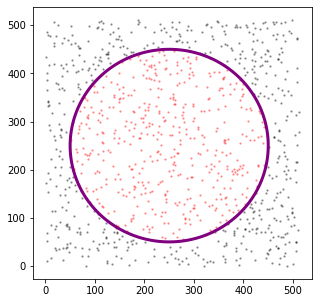

In [5]:
plt.figure(figsize=(5,5))
plt.fill(polygon[:,0], polygon[:,1], facecolor='none', edgecolor='purple', linewidth=3)
plt.scatter(rnd_points[flag==0,0], rnd_points[flag==0,1], c='black', s=2, alpha=0.3)
plt.scatter(rnd_points[flag==1,0], rnd_points[flag==1,1], c='red', s=2, alpha=0.3)
plt.show()

In [6]:
# Data types. https://www.tutorialspoint.com/numpy/numpy_data_types.htm
# unit8.  Unsigned integer (0 to 255).
# uint16.  Unsigned integer (0 to 65535).

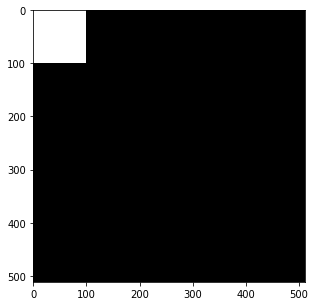

In [7]:
# Create the canvas.
canvas = np.zeros((512, 512),dtype='uint8')
canvas[0:100,0:100]= 255
plt.figure(figsize=(5,5))
plt.imshow(canvas,cmap='gray')
plt.show()

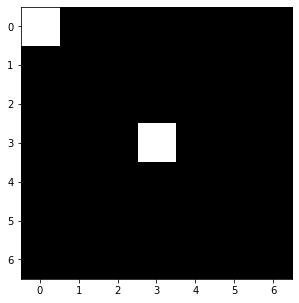

In [8]:
# Create the canvas.
spot_area = np.zeros((7, 7),dtype='uint8')
spot_area[3,3]= 255
spot_area[0,0]= 255
plt.figure(figsize=(5,5))
plt.imshow(spot_area,cmap='gray')
plt.show()

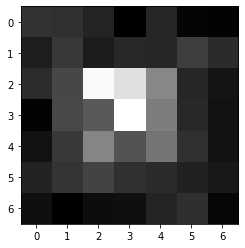

In [9]:
# function that takes a position and generates a pixelated spot
spot_area = np.zeros((7, 7),dtype='uint8')
center_position = [3,3]
size_area = 7
def make_pixelated_spot(spot_area, center_position,size_area):
    for i in range(0,size_area):
        for j in range(0,size_area):
            # detecting points in the center
            if (i in [center_position[0]-1,center_position[0],center_position[0]+1]) and (j in [center_position[1]-1,center_position[1],center_position[1]+1]):
                spot_area[i,j] = random.randint(100, 250)   
            # detecting first points arround the center
            if (i in [center_position[0]-2,center_position[0]+2]) or (j in [center_position[1]-2,center_position[1]+2]):    
                spot_area[i,j] = random.randint(50, 100)
            # detecting second points arround the center
            if (i in [center_position[0]-3,center_position[0]+3]) or (j in [center_position[1]-3,center_position[1]+3]):    
                spot_area[i,j] = random.randint(20, 80)
            # making sure that the central point has the maximum intensity
            if (i == center_position[0]) and (j == center_position[1]):
                spot_area[i,j] = random.randint(250, 255)     
    return spot_area
new_pixel_area = make_pixelated_spot(spot_area, center_position,size_area)
plt.figure(figsize=(4,4))
plt.imshow(new_pixel_area,cmap='gray')
plt.show()

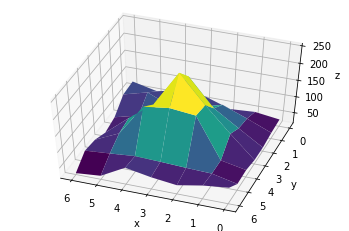

In [10]:
# https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html

new_pixel_area = make_pixelated_spot(spot_area, center_position,size_area)

# dynamic figure
#%matplotlib notebook

%matplotlib inline 

x = np.arange(0,size_area,1)
y = np.arange(0,size_area,1)
X, Y = np.meshgrid(x, y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, spot_area, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
ax.view_init(50, 110)

In [34]:
def gaussian_kernel(size=7, sigma=2):
    ax = np.linspace(-(size - 1) / 2., (size - 1) / 2., size)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-0.5 * (np.square(xx) + np.square(yy)) / np.square(sigma))
    return kernel / np.sum(kernel) , xx, yy

In [35]:
gaussian_kernel_matrix, xx, yy = gaussian_kernel(7, sigma=1)

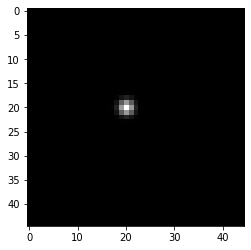

In [36]:
spot_area = np.zeros((45, 45),dtype='uint8')
spot_area[:] = 0
center_position = [20,20]
size_area = 7

iterative_list_x = np.arange(center_position[0]-int(size_area/2),center_position[0]+int(size_area/2)+1,1)
iterative_list_y = np.arange(center_position[1]-int(size_area/2),center_position[1]+int(size_area/2)+1,1)

spot_area[center_position[0]-int(size_area/2): center_position[0]+int(size_area/2)+1 ,center_position[1]-int(size_area/2): center_position[1]+int(size_area/2)+1 ] = gaussian_kernel_matrix*200

plt.imshow(spot_area,cmap='gray')


In [ ]:
# function that takes a position and generates a pixelated spot
spot_area = np.zeros((15, 15),dtype='uint8')
spot_area[:] = 100
center_position = [7,7]
size_area = 7
def make_pixelated_spot2(spot_area, center_position,size_area):
    
    iterative_list_x = np.arange(center_position[0]-int(size_area/2),center_position[0]+int(size_area/2)+1,1)
    iterative_list_y = np.arange(center_position[1]-int(size_area/2),center_position[1]+int(size_area/2)+1,1)
    
    for i in iterative_list_x:
        for j in iterative_list_y:
            
            # detecting points in the center
            if (i in [center_position[0]-1,center_position[0],center_position[0]+1]) and (j in [center_position[1]-1,center_position[1],center_position[1]+1]):
                spot_area[i,j] = random.randint(200, 250)   
            # detecting first points arround the center
            if (i in [center_position[0]-2,center_position[0]+2]) or (j in [center_position[1]-2,center_position[1]+2]):    
                spot_area[i,j] = random.randint(50, 100)
            # detecting second points arround the center
            if (i in [center_position[0]-3,center_position[0]+3]) or (j in [center_position[1]-3,center_position[1]+3]):    
                spot_area[i,j] = random.randint(20, 80)
            # making sure that the central point has the maximum intensity
            if (i == center_position[0]) and (j == center_position[1]):
                spot_area[i,j] = random.randint(250, 255)     
    return spot_area

new_pixel_area = make_pixelated_spot2(spot_area, center_position,size_area)
plt.figure(figsize=(5,5))
plt.imshow(new_pixel_area,cmap='gray')
plt.show()

In [ ]:
def make_pixelated_cell(matrix, center_position_vector, size_area):
    spot_area = matrix.copy()
    for p in range(0,len(center_position_vector)):
        center_position = center_position_vector[p]
        iterative_list_x = np.arange(center_position[0]-int(size_area/2),center_position[0]+int(size_area/2)+1,1)
        iterative_list_y = np.arange(center_position[1]-int(size_area/2),center_position[1]+int(size_area/2)+1,1)
        for i in iterative_list_x:
            for j in iterative_list_y:
                # detecting points in the center
                if (i in [center_position[0]-1,center_position[0],center_position[0]+1]) and (j in [center_position[1]-1,center_position[1],center_position[1]+1]):
                    spot_area[i,j] = random.randint(200, 250)   
                # detecting first points arround the center
                if (i in [center_position[0]-2,center_position[0]+2]) or (j in [center_position[1]-2,center_position[1]+2]):    
                    spot_area[i,j] = random.randint(50, 100)
                # detecting second points arround the center
                if (i in [center_position[0]-3,center_position[0]+3]) or (j in [center_position[1]-3,center_position[1]+3]):    
                    spot_area[i,j] = random.randint(20, 80)
                # making sure that the central point has the maximum intensity
                if (i == center_position[0]) and (j == center_position[1]):
                    spot_area[i,j] = random.randint(250, 255)    
    return spot_area

In [ ]:
#coord_spots = rnd_points[flag,:]
#coord_spots = points_in_cell.astype(int)

In [ ]:
# function that takes a position and generates a pixelated spot
points_in_cell = rnd_points[flag,:]
points_in_cell = points_in_cell.astype(int)
pixel_area = np.zeros((512, 512),dtype='uint8')
pixel_area[:,:] = 50
size_area = 7

pixel_area = make_pixelated_cell(pixel_area, points_in_cell, size_area)

plt.figure(figsize=(10,10))
plt.imshow(pixel_area,cmap='gray')
plt.show()

In [ ]:
plt.imshow(pixel_area[150:180,150:180],cmap='gray')
plt.show()

In [ ]:
# Add salt-and-pepper noise to the image
noisy_cell = random_noise(pixel_area, mode='gaussian', mean=0.01, var=0.05)

# The above function returns a floating-point image in the range [0, 1]
# so need to change it to 'uint8' with range [0,255]
noisy_cell = np.array(255 * noisy_cell, dtype=np.uint8)

plt.figure(figsize=(10,10))
plt.fill(polygon[:,0], polygon[:,1], facecolor='none', edgecolor='yellow', linewidth=1)
plt.imshow(noisy_cell,cmap='gray')
plt.show()

In [ ]:
plt.imshow(noisy_cell[150:180,150:180],cmap='gray')
plt.show()

In [ ]:
# spots with brownian motion
n_frames =  10 # video.shape[0]
width = 512 # video.shape[1]
heigth = 512 # video.shape[2]
n_channels = 1 # video.shape[3]

D =5 # Diffusion coeffient for Brownian Motion
stepSize = 1
k = np.sqrt(2*D*stepSize) # scaling factor for Brownian motion.
n_frames = 100
step_size = 1

nSpots = len(rnd_points[flag])
x_positions = np.array(rnd_points[flag,0],dtype='uint16') #  x_position for selected spots inside the polygon
y_positions = np.array(rnd_points[flag,1],dtype='uint16') #  y_position for selected spots inside the polygon

newPosition_x = np.zeros_like(x_positions,dtype='uint16')
newPosition_y = np.zeros_like(y_positions,dtype='uint16')

newPosition_x = x_positions
newPosition_y = y_positions

pixel_area_tensor = np.zeros((n_frames,width,heigth),dtype='uint8')
spot_positions_movement = np.zeros((2,nSpots),dtype='uint16')

pixel_area = np.zeros((512, 512),dtype='uint8')



for tp in np.arange(0, n_frames, step_size):
    for i_p in range (1, nSpots):
        newPosition_x[i_p]= int(newPosition_x[i_p]+ k * np.random.rand(1))
        newPosition_y[i_p]= int(newPosition_y[i_p]+ k * np.random.rand(1))
        
        if path.contains_point((newPosition_x[i_p],newPosition_y[i_p])) == 0:
            newPosition_x[i_p]= x_positions[i_p]
            newPosition_y[i_p]= y_positions[i_p]
    spot_positions_movement = np.concatenate((newPosition_x,newPosition_y),axis=0).reshape((2,nSpots)) 
    pixel_area_tensor[tp,:,:] = make_pixelated_cell(pixel_area, spot_positions_movement, size_area)

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(pixel_area_tensor[1,:,:],cmap='gray')
plt.show()

In [ ]:

def figure_viewer(frame):
    plt.figure(figsize=(10,10))


    plt.imshow(pixel_area_tensor[frame,:,:],cmap='gray')
    plt.show()
interactive_plot = interactive(figure_viewer, frame = widgets.IntSlider(min=0,max=n_frames-1,step=1,value=0,description='frame'))
interactive_plot

In [ ]:
points_in_cell

In [ ]:
spot_positions_movement = np.concatenate((newPosition_x,newPosition_y),axis=0).reshape((2,nSpots)) 
spot_positions_movement

In [ ]:
coord_spots[:,0]

In [ ]:
raise

In [ ]:
# photobleaching
photobleaching_exp_constant = 0.001;
    photobleaching = exp(photobleaching_exp_constant*tp);
    photobleaching(photobleaching>1)=1;
    photobleaching(photobleaching<0)=0;
    membraneColor*[1 1 1]*photobleaching

In [ ]:
newPosition_x = np.zeros_like(x_positions)
newPosition_y = np.zeros_like(y_positions)
#spot_positions_movement = np.hstack((newPosition_x.transpose,newPosition_y.transpose))


In [ ]:
spot_positions_movement.shape